# Imports

## Import Packages

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, norm, chi2
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

from notebooks.DBSCAN import SPARC_IBD_CADD15_GenePy

## Import Functions

In [2]:
from src.K_Means_optimisation_GenePy import KM_opt, KM_opt_stabl, KM, KM_random, compute_ari_matrix, KM_RF, merge_phen_genepy, compute_clustering_metrics
from src.cluster_enrichment_analysis import analyze_cluster_deviations
from src.Plotting import plotk, plot_ari_heatmap, plot_clustering_metrics

## Import SPARC IBD CADD15 GenePy Matrix

In [3]:
#Import SPARC IBD CADD15 GenePy matrix
#SPARC_IBD_CADD15_GenePy = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/IBD Data/IBD Plexus/GenePy/sparc_ibd_ccds_CADD15_merged_filt_mmscaled.matrix")
SPARC_IBD_CADD15_GenePy = pd.read_table('/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/IBD Data/IBD Plexus/GenePy/sparc_ibd_ccds_CADD15_merged_filt_mmscaled.matrix')
#Set samid as index
SPARC_IBD_CADD15_GenePy = SPARC_IBD_CADD15_GenePy.set_index("samid")

## Import Southampton IBD CADD15 GenePy Matrix

In [5]:
# Import Soton Local IBD CADD15 GenePy matrix
#dtype_dict = {"Gender": "object", "Age at diagnosis": "float64",
#              'Diagnosis': "object", "Stricturing": "object", "Fistulating": "object",
#              'Granuloma': "object", 'IBD Surgery': 'int64', 'IBD phenotype': 'object'}

#SotonIBD_CADD15_GenePy = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/IBD Data/Soton Local IBD/GenePy/jcmar24_IBD_CADD15_merged_filt_mmscaled.matrix"
                                       #,dtype=dtype_dict
#                                       )
SotonIBD_CADD15_GenePy = pd.read_table("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/IBD Data/Soton Local IBD/GenePy/jcmar24_IBD_CADD15_merged_filt_mmscaled.matrix")

#Set samid as index
SotonIBD_CADD15_GenePy = SotonIBD_CADD15_GenePy.set_index("Samid")

#SotonIBD_CADD15_GenePy = SotonIBD_CADD15_GenePy[SotonIBD_CADD15_GenePy['Diagnosis'] != "NOT_IBD"]

## Import Mt Sinai IBD CADD15 GenePy Matrix

In [6]:
#MSCCR_CADD15_GenePy = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/IBD Data/Mt Sinai/GenePy/jcJul25_Sinai_ccds_merged_subset_CADD15.mmscaled.matrix")

#Set samid as index
#MSCCR_CADD15_GenePy = MSCCR_CADD15_GenePy.set_index("sample_ids")

MSCCR_IBD_CADD15_GenePy = pd.read_table("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/IBD Data/Mt Sinai/GenePy/jcJul25_Sinai_ccds_IBD_merged_subset_CADD15.mmscaled.matrix")
MSCCR_IBD_CADD15_GenePy = MSCCR_IBD_CADD15_GenePy.set_index("sample_ids")

## Import Gene Lists

In [4]:
NOD_sig_genes9 = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/NOD_sig_genes9.txt")
NOD_sig_genes12 = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/NOD_sig_genes12.txt")
NOD_sig_genes13 = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/NOD_sig_genes13.txt")
NOD_sig_genes43 = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/NOD_sig_genes43.txt")
JAK_STAT_sig_genes_30 = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/JAK_STAT_sig_genes30.txt")
IL10_sig_genes_13 = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/IL10_sig_genes13.txt")
IL10_sig_genes_49 = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/IL10_sig_genes49.txt")
IL23_sig_genes_20 = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/IL23_genes20.txt")
Th17_sig_genes_11 = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/Th17_genes11.txt") #All of these genes are in the list of 20 IL-23 signalling genes
NADPH_genes_12 = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/NADPH_sig_genes12.txt")
NADPH_genes_36 = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/NADPH_sig_genes36.txt")

In [ ]:
NOD2_gene = NOD_sig_genes9.loc[NOD_sig_genes9['Gene name'] == 'NOD2',:]
NOD_sig_genes9_noNOD2 = NOD_sig_genes9.loc[NOD_sig_genes9['Gene name'] != 'NOD2',:]

### IBD Consensus Pathways

In [ ]:
IBD_consensus_paths = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Progression Reviews/Confirmation Progression Review/Supp material/Consensus IBD pathway genes.txt")
IBD_union_genes = IBD_consensus_paths.loc[(IBD_consensus_paths['NOD signalling consensus 2'] == 1) | (IBD_consensus_paths['IL-10 signalling consensus 2'] == 1) | (IBD_consensus_paths['IL-23 signalling consensus 2'] == 1) |
(IBD_consensus_paths['Th17 differentiation consensus 2']) | (IBD_consensus_paths['JAK-STAT consensus 2'] == 1) | (IBD_consensus_paths['NADPH oxidases consensus 2'] == 1),:]
IBD_union_genes = IBD_union_genes.iloc[:,list(range(0,4)) + [11] + [13] + [15] +[17] + [19] + [21]]
IBD_union_genes.loc[IBD_union_genes['Gene name'] == 'NOXO1', 'Gene stable ID'] = "ENSG00000196408"

In [ ]:
IBD_union_genes['GenePy gene'] = IBD_union_genes['Gene stable ID'] + "_" + IBD_union_genes['Gene name'] + "_CADD15_matrix"
IBD_union_genes_sparc = IBD_union_genes.loc[:,['Gene stable ID', 'Gene name', 'GenePy gene']]

In [9]:
#IBD_union_genes_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/IBD_union_genes.txt", index=False, sep='\t')
#IBD_union_genes = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/IBD_union_genes.txt")
IBD_union_genes = pd.read_table("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Gene lists/IBD_union_genes.txt")
IBD_union_genes27 = pd.read_table("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Gene lists/IBD_union_genes27.txt")
IBD_union_genes15 = pd.read_table("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Gene lists/IBD_union_genes15.txt")

# SPARC IBD

## NOD2

In [ ]:
results_df = KM_opt(SPARC_IBD_CADD15_GenePy, NOD2_gene, 50, cohort_name='SPARC')

In [ ]:
plotk(results_df, [18,37, 47])

In [ ]:
#k = 18
km_out, X = KM(SPARC_IBD_CADD15_GenePy, NOD2_gene, 18)
km_out_phen_GenePy = merge_phen_genepy(km_out, SPARC_IBD_CADD15_GenePy, X)

In [ ]:
#Get list of patients with no NOD2 signal
SPARC_GenePy_0_NOD2_samid = km_out_phen_GenePy[km_out_phen_GenePy['Cluster'] == 1]['Samid']
SPARC_GenePy_0_NOD2_samid

In [ ]:
km_out_phen_GenePy.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means cluster enrichment analysis/K-Means output/SPARC_KMeans_NOD2_18C_genepy.txt", sep='\t', index=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
print(results_df['Diagnosis']['overall_p_value'])
print(results_df['Crohn s disease phenotype']['overall_p_value'])
print(results_df['IBD surgery final']['overall_p_value'])

In [ ]:
results_df['IBD surgery final']['corr_p_values_chi2'] #.keys()

In [ ]:
#Check range of GenePy for each cluster
km_out_phen_GenePy[km_out_phen_GenePy['Cluster'] == 10]['ENSG00000167207_NOD2_CADD15_matrix'].value_counts()

In [ ]:
#Check counts of clinical variables
km_out_phen_GenePy[km_out_phen_GenePy['Cluster'] == 10]['Diagnosis'].value_counts()

In [ ]:
km_out_phen_GenePy[(km_out_phen_GenePy['Cluster'] == 3) & (km_out_phen_GenePy['Diagnosis'] == "CD")]['Crohn s disease phenotype'].value_counts()

## 9 NOD Signalling Genes

In [ ]:
#Optimise k based on silhouette score and DBI
results_df = KM_opt(SPARC_IBD_CADD15_GenePy, NOD_sig_genes9, 50, cohort_name='SPARC')

In [ ]:
results_df

In [ ]:
plotk(results_df, [12,21, 34])

In [ ]:
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SPARC_IBD_CADD15_GenePy, NOD_sig_genes9, 50, "SPARC", n_iter=100)
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_NODsig9_clustering_metrics.txt", sep="\t", index=False)
metrics_df=pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/SPARC_NODsig9_clustering_metrics.txt", index_col=None)

In [ ]:
metrics_df

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[12, 23])

### K = 12

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes9, 12)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_KMeans_9F_12C_NOD_2_genepy.txt", sep='\t', index=False)

In [ ]:
#km_out_sparc.value_counts()
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 23

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes9, 23)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
#km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_KMeans_9F_23C_NOD_2_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_sparc.value_counts()

In [ ]:
feat_imp_sparc = KM_RF(km_out_sparc, X)

In [ ]:
feat_imp_sparc[feat_imp_sparc['Cluster'] == 17].sort_values("Importance", ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])

In [ ]:
#results_df['Diagnosis']['overall_p_value'] #.keys()
#type(results_df['Diagnosis']['overall_p_value'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 35

In [ ]:
#For k = 21, silhouette score is 0.5126 and the DBI score is 0.8283
#k = 15; silhouette score = 0.398559; DBI = 0.923939
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes9, 35)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)

In [ ]:
km_out_phen_GenePy.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means cluster enrichment analysis/K-Means output/SPARC_KMeans_9F_35C_NOD_2_genepy.txt", sep='\t', index=False)

In [ ]:
feat_imp_sparc = KM_RF(km_out, X)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])

In [ ]:
### NOD2 analysis
#Sort clusters by feature importance of NOD2 CADD15 GenePy
feat_imp_sparc[feat_imp_sparc['Feature'] == "ENSG00000167207_NOD2_CADD15_matrix"].sort_values(by="Importance", ascending=False)

In [ ]:
feat_imp_sparc[feat_imp_sparc['Cluster'] == 17].sort_values(by="Importance", ascending=False)

In [ ]:
#Check range of GenePy for each cluster
km_out_phen_GenePy[km_out_phen_GenePy['Cluster'] == 1]['ENSG00000106100_NOD1_CADD15_matrix'].value_counts()

In [ ]:
#Check counts of clinical variables
km_out_phen_GenePy_sparc[km_out_phen_GenePy_sparc['Cluster'] == 3]['Diagnosis'].value_counts()

In [ ]:
km_out_phen_GenePy_sparc[(km_out_phen_GenePy_sparc['Cluster'] == 3) & (km_out_phen_GenePy_sparc['Diagnosis'] == "CD")]['Crohn s disease phenotype'].value_counts()

In [ ]:
km_out_phen_GenePy[km_out_phen_GenePy['Cluster'] == 21].value_counts(['Diagnosis', 'Crohn s disease phenotype', "IBD surgery final"])

In [ ]:
#Check raw and multiple-test-corrected p-values
results_df['Diagnosis']['p_values_chi2']#.keys()

### K = 21

In [ ]:
feat_imp = KM_RF(km_out, X)

In [ ]:
feat_imp[feat_imp['Cluster'] == 7].sort_values(by='Importance', ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])

In [ ]:
results_df['Diagnosis']['corr_p_values_chi2']#.keys()

In [ ]:
#Cluster 14 - enriched for CD and depleted for UC
#193 CD/UC patients with NOD2 GenePy within 0.2607 to 0.4545, RIPK2 GenePy =< 0.1756 (192 have a score of 0) and NOD1 within 0 and 0.394107
SotonIBD_CADD15_GenePy['cluster 14'] = ((SotonIBD_CADD15_GenePy['ENSG00000167207_NOD2'] >= 0.260743) & (SotonIBD_CADD15_GenePy['ENSG00000167207_NOD2'] <= 0.454504) &
                                             (SotonIBD_CADD15_GenePy['ENSG00000104312_RIPK2'] <= 0.175602) & (SotonIBD_CADD15_GenePy['ENSG00000106100_NOD1'] <= 0.394107)).astype(int)

# SotonIBD_CADD15_GenePy['cluster 14'] = ((SotonIBD_CADD15_GenePy['ENSG00000167207.15_NOD2'] >= 0.260743) & (SotonIBD_CADD15_GenePy['ENSG00000167207.15_NOD2'] <= 0.454504) &
#                                               (SotonIBD_CADD15_GenePy['ENSG00000104312.8_RIPK2'] <= 0.175602) & (SotonIBD_CADD15_GenePy['ENSG00000106100.11_NOD1'] <= 0.394107)).astype(int)

In [ ]:
#Cluster 19 is depleted for UC (n = 113)
#NOD2 (47.15%) -> 0.132311-0.406112
#RIPK2 (46.16%) -> 0.175602-0.490679
#NOD1 (2.1369%) -> <= 0.127193
SotonIBD_CADD15_GenePy['cluster 19'] = ((SotonIBD_CADD15_GenePy['ENSG00000167207_NOD2'] >= 0.132311) &
                                               (SotonIBD_CADD15_GenePy['ENSG00000167207_NOD2'] <= 0.406112) &
                                               #(SotonIBD_CADD15_GenePy['ENSG00000104312_RIPK2'] >= 0.175602) &
                                               #(SotonIBD_CADD15_GenePy['ENSG00000104312_RIPK2'] <= 0.490679) &
                                              (SotonIBD_CADD15_GenePy['ENSG00000106100_NOD1'] <= 0.127193)).astype(int)

In [ ]:
#Cluster 4 is depleted for UC
#NOD2 (96.76%) -> >= 0.732
SotonIBD_CADD15_GenePy['cluster 4'] = (SotonIBD_CADD15_GenePy['ENSG00000167207_NOD2'] >= 0.732).astype(int)

In [ ]:
#Cluster 12 -> 357 patients with NOD2 0 and CHUK 0, RIPK2 0
SotonIBD_CADD15_GenePy['cluster 12'] = ((SotonIBD_CADD15_GenePy['ENSG00000167207_NOD2'] == 0) & (SotonIBD_CADD15_GenePy['ENSG00000213341_CHUK'] == 0)
                                            & (SotonIBD_CADD15_GenePy['ENSG00000104312_RIPK2'] == 0)).astype(int)

In [ ]:
SotonIBD_CADD15_GenePy.loc[(SotonIBD_CADD15_GenePy['ENSG00000104312_RIPK2'] >= 0.175602) & (SotonIBD_CADD15_GenePy['ENSG00000104312_RIPK2'] <= 0.490679),:].value_counts("ENSG00000104312_RIPK2")

## 43 NOD Signalling Genes

In [ ]:
results_df = KM_opt(SPARC_IBD_CADD15_GenePy, NOD_sig_genes43, 50, cohort_name='SPARC')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SPARC_IBD_CADD15_GenePy, NOD_sig_genes43, 50, "SPARC", n_iter=100)
metrics_df = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_NODsig43_clustering_metrics.txt")
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_NODsig43_clustering_metrics.txt", sep="\t", index=False)

In [ ]:
results_df

In [ ]:
metrics_df

In [ ]:
plotk(results_df, [9, 29, 43])

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[9, 20, 29, 42])

### K = 9

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes43, 9)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_KMeans_43F_9C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
X.var()

In [ ]:
km_out_sparc.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 20

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes43, 20)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
#km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_KMeans_43F_20C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_sparc.value_counts().sort_values(ascending=False)

In [ ]:
feat_imp_sparc = KM_RF(km_out_sparc, X)

In [ ]:
#feat_imp_sparc[(feat_imp_sparc['Importance'] <= 0.60) & (feat_imp_sparc['Importance'] >= 0.10)]
feat_imp_sparc[feat_imp_sparc['Feature'] == 'ENSG00000185386_MAPK11_CADD15_matrix']
#feat_imp_sparc[feat_imp_sparc['Cluster'] == 6]

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 29

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes43, 29)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
#km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_KMeans_43F_29C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_sparc.value_counts().sort_values(ascending=False)

In [ ]:
feat_imp_sparc = KM_RF(km_out_sparc, X)

In [ ]:
feat_imp_sparc[(feat_imp_sparc['Importance'] <= 0.60) & (feat_imp_sparc['Importance'] >= 0.10)]

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 42

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes43, 42)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_KMeans_43F_42C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_sparc.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### Other K

In [ ]:
# k = 16
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes43, 16)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)

In [ ]:
#km_out.value_counts()

In [ ]:
feat_imp = KM_RF(km_out_sparc, X)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])

In [ ]:
results_df['Diagnosis']['corr_p_values_chi2']

In [ ]:
results_df['Crohn s disease phenotype']['corr_p_values_chi2']

In [ ]:
results_df['IBD surgery final']['corr_p_values_chi2']

In [ ]:
#Cluster 1
#NOD2 70.22% -> 0.1323 - 0.3652
#SUGT1 3.96% -> <= 0.2013
#ERBIN 2.67% ->  <= 0.3058
#MAPK12 2.09% -> <= 0.2843
#NOD1 1.75% -> <= 0.2768
#RELA 1.69% -> 0
#BIRC3 1.69% -> 0
#NLRP1 1.43% -> <= 0.2021
#CASP8 1.32% -> <= 0.09
SotonIBD_CADD15_GenePy['Cluster 1'] = ((SotonIBD_CADD15_GenePy['ENSG00000167207_NOD2'] >= 0.132311468176971) & (SotonIBD_CADD15_GenePy['ENSG00000167207_NOD2'] <= 0.365205488832726)
                                       & (SotonIBD_CADD15_GenePy['ENSG00000165416_SUGT1'] <= 0.201280690665366) & (SotonIBD_CADD15_GenePy['ENSG00000112851_ERBIN'] <= 0.375835188227294)&
                                       (SotonIBD_CADD15_GenePy['ENSG00000188130_MAPK12'] <= 0.284265744209123) & (SotonIBD_CADD15_GenePy['ENSG00000106100_NOD1'] <= 0.276787154268017) &
                                       (SotonIBD_CADD15_GenePy['ENSG00000173039_RELA'] == 0) & (SotonIBD_CADD15_GenePy['ENSG00000023445_BIRC3'] == 0) &
                                       (SotonIBD_CADD15_GenePy['ENSG00000091592_NLRP1'] <= 0.202101747859509)).astype(int)

In [ ]:
#Cluster 5
#NOD2 46.21% -> 0
#SUGT1 13.83% -> <= 0.007
#ERBIN 5.16% -> <= 0.3254
#MAPK12 4.22% -> <= 0.2843
#NOD1 3.65% -> <= 0.3178
#RELA 3.59% -> 0
#NRLP1 3.15% -> <= 0.2021
#CARD9 2.84% -> 0
#BIRC3 2.31% -> 0
#TAB1 2.12% -> 0
#CARD8 1.77% -> 0
#NLRP7 1.31% -> 0
SotonIBD_CADD15_GenePy['Cluster 5'] = ((SotonIBD_CADD15_GenePy['ENSG00000167207_NOD2'] == 0) & (SotonIBD_CADD15_GenePy['ENSG00000165416_SUGT1'] <= 0.0070120773143289)
                                       & (SotonIBD_CADD15_GenePy['ENSG00000112851_ERBIN'] <= 0.325406754325555)
#                                       & (SotonIBD_CADD15_GenePy['ENSG00000188130_MAPK12'] <= 0.284265744209123)
#                                       & (SotonIBD_CADD15_GenePy['ENSG00000106100_NOD1'] <= 0.317840326123237) & (SotonIBD_CADD15_GenePy['ENSG00000173039_RELA'] == 0)
#                                       & (SotonIBD_CADD15_GenePy['ENSG00000091592_NLRP1'] <= 0.202101747859509)&(SotonIBD_CADD15_GenePy['ENSG00000187796_CARD9'] == 0) &
#                                       (SotonIBD_CADD15_GenePy['ENSG00000023445_BIRC3'] == 0)& (SotonIBD_CADD15_GenePy['ENSG00000100324_TAB1'] == 0) &
#                                       (SotonIBD_CADD15_GenePy['ENSG00000105483_CARD8'] == 0)
                                       ).astype(int)

In [ ]:
#Cluster 13
#NOD2 76.41% -> >= 0.3585
#ERBIN 2.08% -> <= 0.5793
#NOD1 1.88% -> <= 0.5118
#CASP9 1.62% -> <= 0.6922
#NLRP12 1.42% <= 0.4622
#MAPK12 1.37% -> <= 0.44
#RELA 1.17% -> <= 0.4136
#CARD6 1.07% -> <= 0.4563
SotonIBD_CADD15_GenePy['Cluster 13'] = ((SotonIBD_CADD15_GenePy['ENSG00000167207_NOD2'] >= 0.358468103620945) & (SotonIBD_CADD15_GenePy['ENSG00000112851_ERBIN'] <= 0.579367065203214) &
                                        (SotonIBD_CADD15_GenePy['ENSG00000106100_NOD1'] <= 0.511821245992663) & (SotonIBD_CADD15_GenePy['ENSG00000132906_CASP9'] <= 0.692219162925112)
                                        & (SotonIBD_CADD15_GenePy['ENSG00000142405_NLRP12'] <= 0.462179899117249)&
                                        (SotonIBD_CADD15_GenePy['ENSG00000188130_MAPK12'] <= 0.442011527819315) & (SotonIBD_CADD15_GenePy['ENSG00000173039_RELA'] <= 0.41358255389904) &
                                        (SotonIBD_CADD15_GenePy['ENSG00000132357_CARD6'] <= 0.456358576821125)
                                        ).astype(int)

In [ ]:
cont_table = pd.crosstab(SotonIBD_CADD15_GenePy['Cluster 1'], SotonIBD_CADD15_GenePy['IBD Surgery'])
#Remove IBDU
#cont_table = cont_table.iloc[:,[0,3]]
#chi square
chi2_stat, p_value, dof, expected = chi2_contingency(cont_table)
p_value

In [ ]:
# k = 38
km_out, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes43, 38)
km_out_phen_GenePy = merge_phen_genepy(km_out, SPARC_IBD_CADD15_GenePy, X)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])

In [ ]:
results_df['Crohn s disease phenotype']['overall_p_value']

In [ ]:
results_df['Diagnosis'].keys()

## 12 NOD Signalling Genes

In [ ]:
#results_df = KM_opt(SPARC_IBD_CADD15_GenePy, NOD_sig_genes12, 50, cohort_name='SPARC')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SPARC_IBD_CADD15_GenePy, NOD_sig_genes13, 50, "SPARC", n_iter=100)
metrics_df = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/SPARC_NODsig12_clustering_metrics.txt")
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/SPARC_NODsig12_clustering_metrics.txt", sep="\t", index=False)

In [ ]:
results_df

In [ ]:
metrics_df

In [ ]:
plotk(results_df, [19, 21, 34])

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[17,25, 35])

### K = 17

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes12, 17)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
#km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/SPARC_KMeans_12F_17C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_sparc.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 25

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes12, 25)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/SPARC_KMeans_12F_25C_NOD_1_genepy.txt", sep='\t', index=False)

### K = 35

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes12, 35)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
#km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/SPARC_KMeans_12F_35C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
feat_imp_sparc = KM_RF(km_out_sparc, X)

In [ ]:
feat_imp_sparc[feat_imp_sparc['Cluster'] == 26].sort_values("Importance", ascending=False)

In [ ]:
feat_imp_sparc[feat_imp_sparc['Feature'] == "ENSG00000112851_ERBIN_CADD15_matrix"].sort_values("Importance", ascending=False)

## 13 NOD Signalling Genes

In [ ]:
#Check top 20 features with highest variance from consensus NOD signalling genes
#SPARC IBD
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes43, 2)
sparc_ibd_NOD_sig20=X.var().sort_values(ascending=False)[0:20].index

#Soton IBD
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, NOD_sig_genes43, 2, "Soton")
soton_ibd_NOD_sig20=X.var().sort_values(ascending=False)[0:20].index

#MSCCR IBD
km_out_msccr_ibd, X = KM(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes43, 2, "MSCCR")
msccr_ibd_NOD_sig20=X.var().sort_values(ascending=False)[0:20].index
intersection=set(sparc_ibd_NOD_sig20.str.split("_").str[0]) & set(soton_ibd_NOD_sig20.str.split("_").str[0]) & set(msccr_ibd_NOD_sig20.str.split(".").str[0])
NOD_sig_genes12=NOD_sig_genes43[NOD_sig_genes43['Gene stable ID'].isin(pd.DataFrame(intersection)[0])]
NOD_sig_genes12.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/NOD_sig_genes12.txt", index=False, sep="\t")

In [ ]:
results_df = KM_opt(SPARC_IBD_CADD15_GenePy, NOD_sig_genes13, 50, cohort_name='SPARC')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SPARC_IBD_CADD15_GenePy, NOD_sig_genes12, 50, "SPARC", n_iter=100)
metrics_df = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/SPARC_NODsig13_clustering_metrics.txt")
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_NODsig12_clustering_metrics.txt", sep="\t", index=False)

In [ ]:
results_df

In [ ]:
metrics_df

In [ ]:
plotk(results_df, [15, 22, 26])

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[16, 23, 33])

### K = 16

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes13, 16)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
#km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_KMeans_13F_16C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_sparc.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 23

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes13, 23)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)

In [ ]:
km_out_sparc.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 33

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, NOD_sig_genes13, 33)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
#km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_KMeans_13F_33C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_sparc.value_counts().sort_values(ascending=False)

In [ ]:
feat_imp_sparc = KM_RF(km_out_sparc, X)

In [ ]:
feat_imp_sparc[feat_imp_sparc['Feature'] == "ENSG00000188130_MAPK12_CADD15_matrix"].sort_values("Importance", ascending=False)

In [ ]:
feat_imp_sparc[feat_imp_sparc['Cluster'] == 30].sort_values("Importance", ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

## 49 IL-10 Signalling Genes

In [ ]:
results_df = KM_opt(SPARC_IBD_CADD15_GenePy, IL10_sig_genes_49, 50, cohort_name='SPARC')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SPARC_IBD_CADD15_GenePy, NOD_sig_genes43, 50, "SPARC", n_iter=100)
metrics_df = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_IL10sig49_clustering_metrics.txt")
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_NODsig43_clustering_metrics.txt", sep="\t", index=False)

In [ ]:
results_df

In [ ]:
metrics_df

In [ ]:
plotk(results_df, [5, 25, 37])

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[25])

### K = 25

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, IL10_sig_genes_49, 20)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_KMeans_47F_25C_IL10_1_genepy.txt", sep='\t', index=False)

## IL-10 Signalling Genes

In [ ]:
#Check top 20 features with highest variance from consensus IL-10 signalling genes
#SPARC IBD
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, IL10_sig_genes_49, 2)
sparc_ibd_IL10_sig20=X.var().sort_values(ascending=False)[0:20].index

#Soton IBD
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, IL10_sig_genes_49, 2, "Soton")
soton_ibd_IL10_sig20=X.var().sort_values(ascending=False)[0:20].index

intersection=set(sparc_ibd_IL10_sig20.str.split("_CADD15_matrix").str[0]) & set(soton_ibd_IL10_sig20)
IL10_sig_genes13=IL10_sig_genes_49[IL10_sig_genes_49['Gene stable ID'].isin(pd.DataFrame(intersection)[0].str.split("_").str[0])]
IL10_sig_genes13.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/IL10_sig_genes13.txt", index=False, sep="\t")

In [ ]:
results_df = KM_opt(SPARC_IBD_CADD15_GenePy, IL10_sig_genes_13, 50, cohort_name='SPARC')
#Optimise k based on silhouette score, DBI, and ARI
metrics_df = compute_clustering_metrics(SPARC_IBD_CADD15_GenePy, IL10_sig_genes_13, 50, "SPARC", n_iter=100)
#metrics_df = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_IL10sig49_clustering_metrics.txt")
metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_IL10sig13_clustering_metrics.txt", sep="\t", index=False)

In [ ]:
results_df

In [ ]:
plotk(results_df)

In [ ]:
metrics_df

## 27 Consensus IBD Genes

In [ ]:
#Check which genes are present in all 3 matrices
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, IBD_union_genes, 2)
sparc_ibd_union_all = X.columns
#sparc_ibd_union_sig20=X.var().sort_values(ascending=False)[0:20].index

#Soton IBD
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, IBD_union_genes, 2, "Soton")
soton_ibd_union_all = X.columns
#soton_ibd_union_sig20=X.var().sort_values(ascending=False)[0:20].index

#MSCCR IBD
km_out_msccr_ibd, X = KM(MSCCR_IBD_CADD15_GenePy, IBD_union_genes, 2, "MSCCR")
msccr_ibd_union_all = X.columns
#msccr_ibd_union_sig20=X.var().sort_values(ascending=False)[0:20].index
intersection=set(sparc_ibd_union_all.str.split("_").str[0]) & set(soton_ibd_union_all.str.split("_").str[0]) & set(msccr_ibd_union_all.str.split(".").str[0])
IBD_union_genes27=IBD_union_genes[IBD_union_genes['Gene stable ID'].isin(pd.DataFrame(intersection)[0])]
#IBD_union_genes27.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/IBD_union_genes27.txt", index=False, sep="\t")

In [ ]:
IBD_union_genes27

In [ ]:
results_df = KM_opt(SPARC_IBD_CADD15_GenePy, IBD_union_genes27, 50, cohort_name='SPARC')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SPARC_IBD_CADD15_GenePy, IBD_union_genes, 50, "SPARC", n_iter=100)
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/SPARC_IBD_union27_clustering_metrics.txt", sep="\t", index=False)
metrics_df = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/SPARC_IBD_union27_clustering_metrics.txt")

In [ ]:
results_df

In [ ]:
metrics_df

In [ ]:
plotk(results_df, [22, 36])

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[19, 29])

### K = 19

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, IBD_union_genes27, 19)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
#km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/SPARC_KMeans_27F_19C_IBD_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_sparc.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 29

In [ ]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, IBD_union_genes27, 29)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/SPARC_KMeans_27F_29C_IBD_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_sparc.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

## 15 Consensus IBD Genes

In [ ]:
#heck top 20 features with highest variance from IBD union genes
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, IBD_union_genes, 2)
#sparc_ibd_union_all = X.columns
sparc_ibd_union_sig20=X.var().sort_values(ascending=False)[0:20].index

#Soton IBD
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, IBD_union_genes, 2, "Soton")
#soton_ibd_union_all = X.columns
soton_ibd_union_sig20=X.var().sort_values(ascending=False)[0:20].index

#MSCCR IBD
km_out_msccr_ibd, X = KM(MSCCR_IBD_CADD15_GenePy, IBD_union_genes, 2, "MSCCR")
#msccr_ibd_union_all = X.columns
msccr_ibd_union_sig20=X.var().sort_values(ascending=False)[0:20].index
intersection=set(sparc_ibd_union_sig20.str.split("_").str[0]) & set(soton_ibd_union_sig20.str.split("_").str[0]) & set(msccr_ibd_union_sig20.str.split(".").str[0])
IBD_union_genes15=IBD_union_genes[IBD_union_genes['Gene stable ID'].isin(pd.DataFrame(intersection)[0])]
IBD_union_genes15.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/IBD_union_genes15.txt", index=False, sep="\t")

In [28]:
results_df = KM_opt(SPARC_IBD_CADD15_GenePy, IBD_union_genes15, 50, cohort_name='SPARC')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SPARC_IBD_CADD15_GenePy, IBD_union_genes15, 50, "SPARC", n_iter=100)
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/SPARC_IBD_union15_clustering_metrics.txt", sep="\t", index=False)
metrics_df = pd.read_table('/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/SPARC_IBD_union15_clustering_metrics.txt')

In [36]:
metrics_df

,k,mean_ari,std_ari,ci_ari,mean_silhouette,std_silhouette,ci_silhouette,mean_dbi,std_dbi,ci_dbi
0,2,0.177680,0.337416,0.009403,0.253762,0.101872,0.020315,1.890972,0.521919,0.104082
1,3,0.301239,0.269758,0.007517,0.198833,0.056616,0.011290,1.923455,0.341084,0.068019
2,4,0.386339,0.209927,0.005850,0.183721,0.037264,0.007431,1.829654,0.225175,0.044905
3,5,0.404614,0.206418,0.005752,0.175754,0.035200,0.007020,1.746107,0.155419,0.030994
4,6,0.402779,0.184305,0.005136,0.175457,0.033094,0.006600,1.652282,0.174037,0.034707
5,7,0.405419,0.179512,0.005003,0.178117,0.028925,0.005768,1.570069,0.148657,0.029645
6,8,0.427507,0.177892,0.004957,0.176375,0.025661,0.005117,1.521762,0.138694,0.027659
7,9,0.413801,0.160368,0.004469,0.176271,0.024316,0.004849,1.465966,0.125192,0.024966
8,10,0.444191,0.158656,0.004421,0.177296,0.019630,0.003915,1.421600,0.109813,0.021899
9,11,0.456947,0.151103,0.004211,0.181156,0.014994,0.002990,1.368015,0.093843,0.018714


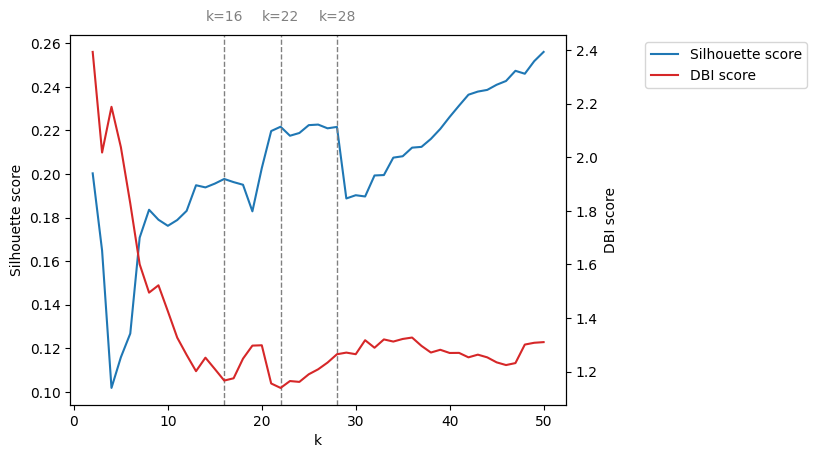

In [31]:
plotk(results_df, [16, 22, 28])

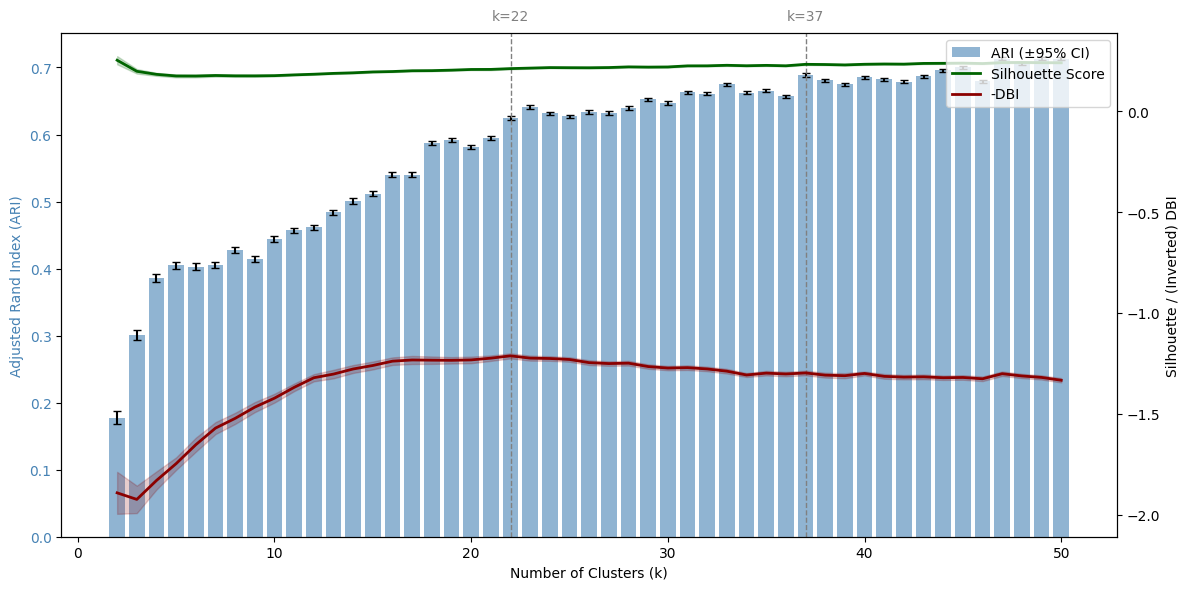

In [37]:
plot_clustering_metrics(metrics_df, vlines=[22, 37])

### K = 22

In [38]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, IBD_union_genes15, 22)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
km_out_phen_GenePy_sparc.to_csv("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/SPARC_KMeans_15F_22C_IBD_genepy.txt", sep='\t', index=False)

In [42]:
km_out_sparc.value_counts().sort_values(ascending=False)

Cluster
4          234
1          229
5          219
10         207
28         183
31         156
22         148
9          136
27         121
17         107
21         107
33          95
32          88
2           84
26          79
35          67
6           64
11          52
23          49
19          48
24          47
3           36
25          35
7           34
12          28
30          28
16          26
0           26
18          24
15          23
14          22
34          18
29          14
20           8
13           7
8            6
36           1
Name: count, dtype: int64

In [43]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_sparc,
                                        ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

[np.float64(3.355495964831201e-08), np.float64(7.933760553804704e-07), np.float64(0.0497918701004421)]


### K = 37

In [41]:
km_out_sparc, X = KM(SPARC_IBD_CADD15_GenePy, IBD_union_genes15, 37)
km_out_phen_GenePy_sparc = merge_phen_genepy(km_out_sparc, SPARC_IBD_CADD15_GenePy, X)
km_out_phen_GenePy_sparc.to_csv("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/SPARC_KMeans_15F_37C_IBD_genepy.txt", sep='\t', index=False)

# Southampton IBD

## NOD2

In [ ]:
results_df = KM_opt(SotonIBD_CADD15_GenePy, NOD2_gene, 50, cohort_name='Soton')

In [ ]:
results_df

In [ ]:
plotk(results_df, [13, 20, 38])

In [ ]:
#k = 13
km_out, X = KM(SotonIBD_CADD15_GenePy, NOD2_gene, 13, "Soton")
km_out_phen_GenePy = merge_phen_genepy(km_out, SotonIBD_CADD15_GenePy, X, "Soton")

In [ ]:
km_out_phen_GenePy.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means cluster enrichment analysis/K-Means output/Soton_KMeans_NOD2_13C_genepy.txt", sep='\t', index=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy, ['Diagnosis', 'IBD phenotype', 'IBD Surgery', 'Granuloma'])
print(results_df['Diagnosis']['overall_p_value'])
print(results_df['IBD phenotype']['overall_p_value'])
print(results_df['IBD Surgery']['overall_p_value'])
print(results_df['Granuloma']['overall_p_value'])

In [ ]:
#Check range of GenePy for each cluster
km_out_phen_GenePy[km_out_phen_GenePy['Cluster'] ==5 ]['ENSG00000167207.15_NOD2'].value_counts()

In [ ]:
#Check counts of clinical variables
km_out_phen_GenePy[km_out_phen_GenePy['Cluster'] == 5]['Diagnosis'].value_counts()

In [ ]:
km_out_phen_GenePy[(km_out_phen_GenePy['Cluster'] == 12) & (km_out_phen_GenePy['Diagnosis'] == "CD")]['IBD phenotype'].value_counts()


## 9 NOD Signalling Genes

In [ ]:
#results_df = KM_opt(SotonIBD_CADD15_GenePy, NOD_sig_genes9, 50, cohort_name='Soton')
metrics_df = compute_clustering_metrics(SotonIBD_CADD15_GenePy, NOD_sig_genes9, 50, "Soton", n_iter=100)

In [ ]:
metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_NODsig8_clustering_metrics.txt", sep="\t", index=False) #No IKBKG GenePy

In [ ]:
metrics_df

In [ ]:
#plotk(results_df,[21, 25, 32])
plot_clustering_metrics(metrics_df, vlines=[10, 16, 31])

### K = 10

In [ ]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, NOD_sig_genes9, 10, "Soton")
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, cohort_name="Soton")
km_out_phen_GenePy_soton.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_KMeans_8F_10C_NOD_2_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_soton.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_soton, ['Diagnosis', 'IBD.phenotype', 'IBD.Surgery'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 16

In [ ]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, NOD_sig_genes9, 16, "Soton")
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, cohort_name="Soton")
#km_out_phen_GenePy_soton.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_KMeans_8F_16C_NOD_2_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_soton.value_counts().sort_values(ascending=False)

In [ ]:
feat_imp_soton = KM_RF(km_out_soton, X)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_soton, ['Diagnosis', 'IBD.phenotype', 'IBD.Surgery'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 31

In [ ]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, NOD_sig_genes9, 31, "Soton")
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, "Soton")
km_out_phen_GenePy_soton.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_KMeans_8F_31C_NOD_2_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_soton.value_counts().sort_values(ascending=False)

In [ ]:
feat_imp = KM_RF(km_out, X)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy, ['Diagnosis', 'IBD.phenotype', 'IBD.Surgery', 'Granuloma'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

In [ ]:
### NOD2 analysis
#Sort clusters by feature importance of NOD2 CADD15 GenePy
feat_imp[feat_imp['Feature'] == "ENSG00000167207.15_NOD2"].sort_values(by="Importance", ascending=False)

In [ ]:
feat_imp[feat_imp['Cluster'] == 17].sort_values(by="Importance", ascending=False)

In [ ]:
#Check range of GenePy for each cluster
km_out_phen_GenePy[km_out_phen_GenePy['Cluster'] == 9]['ENSG00000187796.16_CARD9'].value_counts()

In [ ]:
#Check counts of clinical variables
km_out_phen_GenePy[km_out_phen_GenePy['Cluster'] == 20]['Diagnosis'].value_counts()

In [ ]:
km_out_phen_GenePy[(km_out_phen_GenePy['Cluster'] == 7) & (km_out_phen_GenePy['Diagnosis'] == "CD")]['IBD phenotype'].value_counts()


In [ ]:
km_out_phen_GenePy[km_out_phen_GenePy['Cluster'] == 21].value_counts(['Diagnosis', 'Crohn s disease phenotype', "IBD surgery final"])

In [ ]:
#Check raw and multiple-test-corrected p-values
results_df['Granuloma']['overall_p_value']#.keys()

## 43 NOD Signalling Genes

In [ ]:
results_df = KM_opt(SotonIBD_CADD15_GenePy, NOD_sig_genes43, 50, cohort_name='Soton')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SotonIBD_CADD15_GenePy, NOD_sig_genes43, 50, "Soton", n_iter=100)
metrics_df=pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_NODsig43_clustering_metrics.txt")
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_NODsig43_clustering_metrics.txt", sep="\t", index=False)

In [ ]:
#results_df
metrics_df

In [ ]:
plotk(results_df, [6, 24, 31])

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[8, 16, 34])

### K = 8

In [ ]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, NOD_sig_genes43, 8, "Soton") #39 genes; missing IL-18, NLRP7, NAIP, IKBKG
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, cohort_name="Soton")
km_out_phen_GenePy_soton.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_KMeans_39F_8C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_soton.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_soton, ['Diagnosis', 'IBD.phenotype', 'IBD.Surgery'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 16

In [ ]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, NOD_sig_genes43, 16, "Soton") #39 genes; missing IL-18, NLRP7, NAIP, IKBKG
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, cohort_name="Soton")
#km_out_phen_GenePy_soton.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_KMeans_39F_16C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_soton.value_counts().sort_values(ascending=False)

In [ ]:
feat_imp_soton = KM_RF(km_out_soton, X)

In [ ]:
feat_imp_soton[feat_imp_soton['Feature'] == "ENSG00000185386_MAPK11"]

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_soton, ['Diagnosis', 'IBD.phenotype', 'IBD.Surgery'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 34

In [ ]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, NOD_sig_genes43, 34, "Soton")  #39 genes; missing IL-18, NLRP7, NAIP, IKBKG
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, cohort_name="Soton")
km_out_phen_GenePy_soton.to_csv(
    "C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_KMeans_39F_34C_NOD_1_genepy.txt",
    sep='\t', index=False)

In [ ]:
km_out_soton.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_soton, ['Diagnosis', 'IBD.phenotype', 'IBD.Surgery'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

## 12 NOD Signalling Genes

In [ ]:
#results_df = KM_opt(SotonIBD_CADD15_GenePy, NOD_sig_genes12, 50, cohort_name='Soton')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SotonIBD_CADD15_GenePy, NOD_sig_genes12, 50, "Soton", n_iter=100)
metrics_df=pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/Soton_NODsig12_clustering_metrics.txt")
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_NODsig12_clustering_metrics.txt", sep="\t", index=False)

In [ ]:
results_df

In [ ]:
metrics_df

In [ ]:
plotk(results_df, [9, 22])

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[24, 30])

### K = 24

In [ ]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, NOD_sig_genes12, 24, "Soton")
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, cohort_name="Soton")
#km_out_phen_GenePy_soton.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/Soton_KMeans_12F_24C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_soton.value_counts().sort_values(ascending=False)

In [ ]:
feat_imp_soton = KM_RF(km_out_soton, X)

In [ ]:
feat_imp_soton[feat_imp_soton['Cluster'] == 23].sort_values("Importance", ascending=False)

In [ ]:
feat_imp_soton[feat_imp_soton['Feature'] == "ENSG00000103313_MEFV"].sort_values("Importance", ascending=False)

In [14]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_soton, ['Diagnosis', 'IBD.phenotype', 'IBD.Surgery'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 30

In [15]:
### K = 24
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, NOD_sig_genes12, 30, "Soton")
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, cohort_name="Soton")
#km_out_phen_GenePy_soton.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/Soton_KMeans_12F_30C_NOD_1_genepy.txt", sep='\t', index=False)

,k,mean_ari,std_ari,ci_ari,mean_silhouette,std_silhouette,ci_silhouette,mean_dbi,std_dbi,ci_dbi
0,2,0.347663,0.419992,0.011704,0.515510,0.080279,0.016009,1.026423,0.314030,0.062624
1,3,0.619709,0.241062,0.006718,0.457834,0.082195,0.016392,1.091357,0.300360,0.059898
2,4,0.641778,0.195955,0.005461,0.452972,0.067625,0.013486,1.025340,0.227554,0.045379
3,5,0.648918,0.168387,0.004692,0.460626,0.071201,0.014199,0.987342,0.205775,0.041036
4,6,0.690575,0.154570,0.004307,0.468909,0.056444,0.011256,0.908106,0.153580,0.030627
5,7,0.661768,0.188039,0.005240,0.435939,0.086383,0.017227,0.905838,0.153980,0.030707
6,8,0.761416,0.159783,0.004453,0.466640,0.058600,0.011686,0.820330,0.108931,0.021723
7,9,0.738326,0.172851,0.004817,0.457694,0.070029,0.013965,0.816944,0.108388,0.021615
8,10,0.697622,0.183516,0.005114,0.449171,0.078019,0.015559,0.815795,0.101023,0.020146
9,11,0.733608,0.184967,0.005155,0.460644,0.076060,0.015168,0.805579,0.090676,0.018083


## 13 NOD Signalling Genes

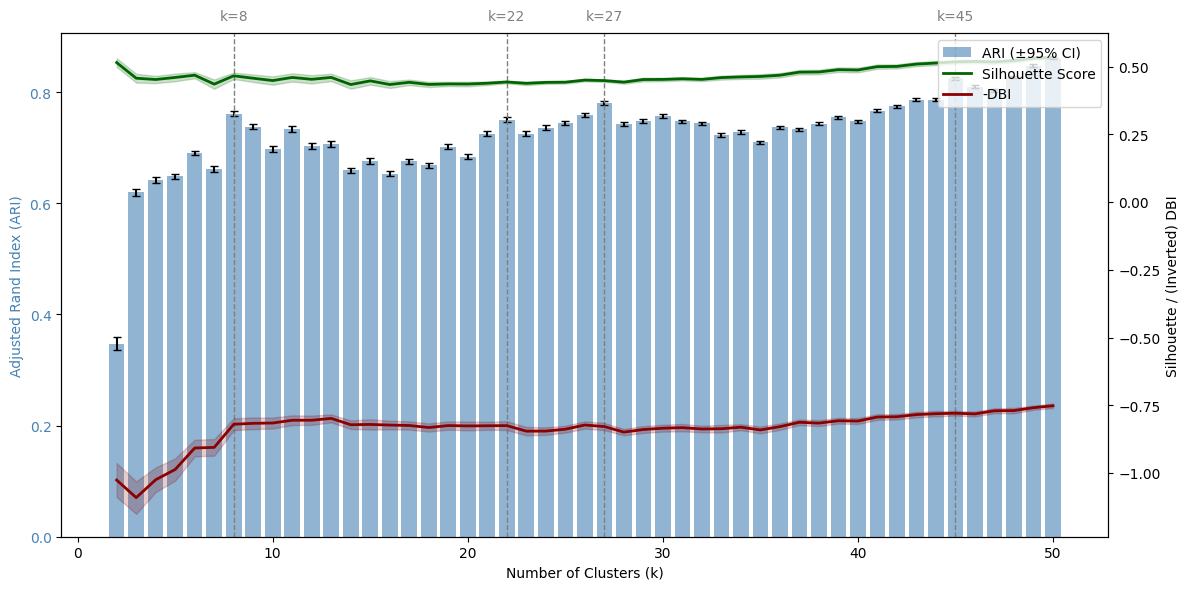

In [18]:
results_df = KM_opt(SotonIBD_CADD15_GenePy, NOD_sig_genes13, 50, cohort_name='Soton')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SotonIBD_CADD15_GenePy, NOD_sig_genes12, 50, "Soton", n_iter=100)
metrics_df=pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/Soton_NODsig13_clustering_metrics.txt")
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_NODsig12_clustering_metrics.txt", sep="\t", index=False)

In [ ]:
results_df

In [8]:
metrics_df

In [ ]:
plotk(results_df, [12, 23, 34, 38])

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[20, 24, 30])

### K = 20

In [ ]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, NOD_sig_genes13, 20, "Soton")
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, cohort_name="Soton")

In [ ]:
km_out_soton.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_soton, ['Diagnosis', 'IBD.phenotype', 'IBD.Surgery'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 24

In [ ]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, NOD_sig_genes13, 24, "Soton")
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, cohort_name="Soton")
#km_out_phen_GenePy_soton.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_KMeans_13F_24C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_soton.value_counts().sort_values(ascending=False)

In [ ]:
feat_imp_soton = KM_RF(km_out_soton, X)

In [ ]:
feat_imp_soton[feat_imp_soton['Feature'] == "ENSG00000188130_MAPK12"].sort_values("Importance", ascending=False)

In [ ]:
feat_imp_soton[feat_imp_soton['Cluster'] == 2].sort_values("Importance", ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_soton, ['Diagnosis', 'IBD.phenotype', 'IBD.Surgery'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 30

In [ ]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, NOD_sig_genes13, 30, "Soton")
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, cohort_name="Soton")

In [ ]:
km_out_soton.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_soton, ['Diagnosis', 'IBD.phenotype', 'IBD.Surgery'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

## 49 IL-10 Signalling Genes

In [ ]:
results_df = KM_opt(SotonIBD_CADD15_GenePy, IL10_sig_genes_49, 50, cohort_name='Soton')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SotonIBD_CADD15_GenePy, NOD_sig_genes43, 50, "Soton", n_iter=100)
metrics_df=pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_IL10sig49_clustering_metrics.txt")
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_NODsig43_clustering_metrics.txt", sep="\t", index=False)

In [ ]:
results_df

In [ ]:
metrics_df

In [ ]:
plotk(results_df, [6, 35])

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[17, 29, 36])

### K = 29

In [ ]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, IL10_sig_genes_49, 29, "Soton") #42 genes
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, cohort_name="Soton")
km_out_phen_GenePy_soton.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_KMeans_42F_29C_IL10_1_genepy.txt", sep='\t', index=False)

## 27 Consensus IBD Genes

In [ ]:
results_df = KM_opt(SotonIBD_CADD15_GenePy, IBD_union_genes27, 50, cohort_name='Soton')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SotonIBD_CADD15_GenePy, IBD_union_genes15, 50, "Soton", n_iter=100)
metrics_df=pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/Soton_IBD_union27_clustering_metrics.txt")
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_IBD_union15_clustering_metrics.txt", sep="\t", index=False)

In [ ]:
metrics_df

In [ ]:
plotk(results_df, [13, 24])

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[21, 29, 36])

In [ ]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, IBD_union_genes27, 36, "Soton")
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, "Soton")
#km_out_phen_GenePy_sparc.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/SPARC_KMeans_27F_19C_IBD_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_soton.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_soton, ['Diagnosis', 'IBD.phenotype', 'IBD.Surgery'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

## 15 Consensus IBD Genes

In [44]:
results_df = KM_opt(SotonIBD_CADD15_GenePy, IBD_union_genes15, 50, cohort_name='Soton')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SotonIBD_CADD15_GenePy, IBD_union_genes15, 50, "Soton", n_iter=100)
metrics_df=pd.read_table("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/Soton_IBD_union15_clustering_metrics.txt")
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_IBD_union15_clustering_metrics.txt", sep="\t", index=False)

In [50]:
metrics_df

,k,mean_ari,std_ari,ci_ari,mean_silhouette,std_silhouette,ci_silhouette,mean_dbi,std_dbi,ci_dbi
0,2,0.123983,0.299037,0.008333,0.375922,0.141007,0.028120,1.580126,0.599717,0.119596
1,3,0.282615,0.317061,0.008836,0.307871,0.106249,0.021188,1.531252,0.350343,0.069866
2,4,0.398459,0.274882,0.007660,0.262265,0.072886,0.014535,1.521842,0.269386,0.053721
3,5,0.521980,0.243256,0.006779,0.267439,0.046262,0.009226,1.366505,0.174296,0.034758
4,6,0.522033,0.228606,0.006371,0.267558,0.058993,0.011765,1.307193,0.211372,0.042152
5,7,0.549200,0.195560,0.005450,0.273912,0.043341,0.008643,1.254589,0.163905,0.032686
6,8,0.564579,0.184273,0.005135,0.269822,0.051490,0.010268,1.210859,0.155735,0.031057
7,9,0.532000,0.185704,0.005175,0.263780,0.057287,0.011424,1.214808,0.149013,0.029716
8,10,0.563137,0.182083,0.005074,0.264024,0.052889,0.010547,1.154873,0.140622,0.028043
9,11,0.544714,0.174339,0.004858,0.266836,0.054773,0.010923,1.121786,0.119908,0.023912


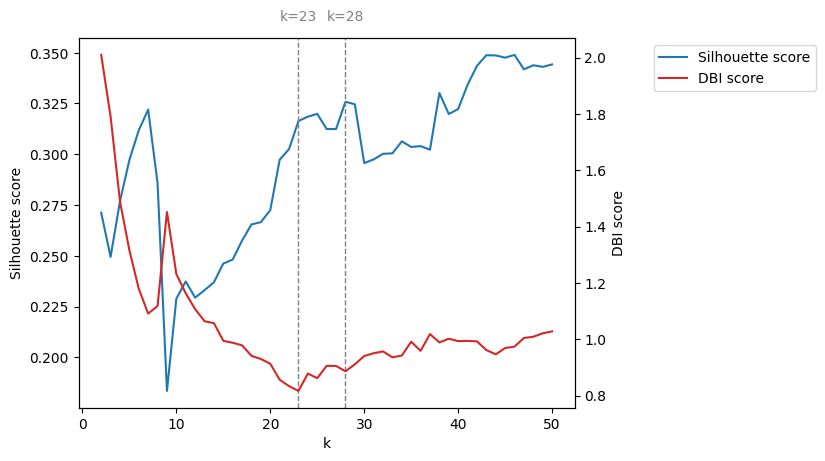

In [47]:
plotk(results_df, [23, 28])

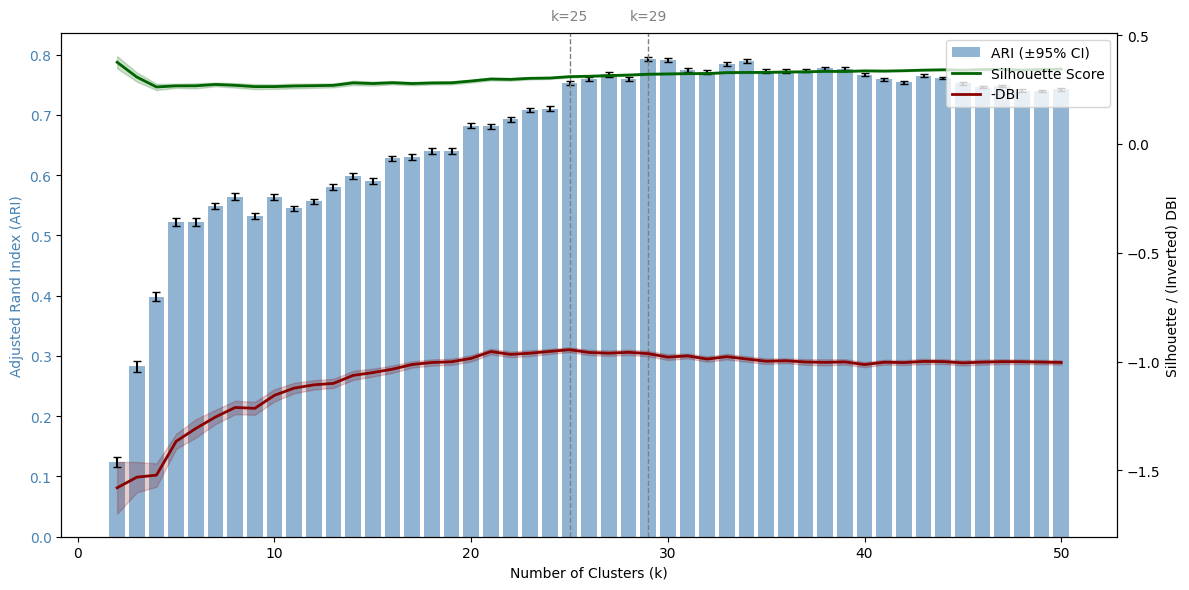

In [52]:
plot_clustering_metrics(metrics_df, vlines=[25, 29])

### K = 25

In [68]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, IBD_union_genes15, 25, "Soton")
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, "Soton")
km_out_phen_GenePy_sparc.to_csv("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/Soton_KMeans_15F_25C_IBD_genepy.txt", sep='\t', index=False)

In [73]:
km_out_soton.value_counts().sort_values(ascending=False)

Cluster
1          373
5          161
0          110
2          101
25          74
8           55
27          49
19          29
23          29
3           29
18          24
13          23
7           22
15          18
11          18
4           17
6           12
22          10
20          10
28          10
21           5
16           5
9            5
26           4
10           3
14           3
17           2
24           2
12           1
Name: count, dtype: int64

In [74]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_soton, ['Diagnosis', 'IBD.phenotype', 'IBD.Surgery'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

[np.float64(0.008410198566681059), 1.0, np.float64(0.6826091870577482)]


### K = 29

In [70]:
km_out_soton, X = KM(SotonIBD_CADD15_GenePy, IBD_union_genes15, 29, "Soton")
km_out_phen_GenePy_soton = merge_phen_genepy(km_out_soton, SotonIBD_CADD15_GenePy, X, "Soton")
km_out_phen_GenePy_sparc.to_csv("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/Soton_KMeans_15F_29C_IBD_genepy.txt", sep='\t', index=False)

# Mt Sinai IBD + Controls

## 9 NOD Signalling Genes

In [ ]:
#Optimise k based on silhouette score and DBI
#results_df = KM_opt(MSCCR_CADD15_GenePy, NOD_sig_genes9, 50, cohort_name='MSCCR')
#Optimise k based on silhouette score, DBI, and ARI
metrics_df = compute_clustering_metrics(MSCCR_CADD15_GenePy, NOD_sig_genes9, 50, "MSCCR", n_iter=100)
metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/MSCCR_NODsig9_clustering_metrics.txt", sep="\t", index=False)
#metrics_df=pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_NODsig9_clustering_metrics.txt", index_col=None)

In [ ]:
results_df

In [ ]:
metrics_df

In [ ]:
plotk(results_df, [8, 22, 44])

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[8, 22, 27, 45])

### K = 27

In [ ]:
km_out_msccr, X = KM(MSCCR_CADD15_GenePy, NOD_sig_genes9, 27, "MSCCR")
km_out_phen_GenePy_msccr = merge_phen_genepy(km_out_msccr, MSCCR_CADD15_GenePy, X, "MSCCR")
km_out_phen_GenePy_msccr.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/MSCCR_KMeans_9F_27C_NOD_2_genepy.txt", sep='\t', index=False)

## NOD Signalling Genes

In [ ]:
#Check top 15 features with highest variance from consensus NOD signalling genes

# Mt Sinai IBD Only

## 9 NOD Signalling Genes

In [ ]:
## 9 NOD Signalling Genes
#Optimise k based on silhouette score and DBI
results_df = KM_opt(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes9, 50, cohort_name='MSCCR')
#Optimise k based on silhouette score, DBI, and ARI
metrics_df = compute_clustering_metrics(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes9, 50, "MSCCR", n_iter=100)
metrics_df.to_csv(
    "C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/MSCCR_IBD_NODsig9_clustering_metrics.txt",
    sep="\t", index=False)
#metrics_df=pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/SPARC_NODsig9_clustering_metrics.txt", index_col=None)

In [ ]:
results_df

In [ ]:
metrics_df

In [ ]:
plotk(results_df, [19, 41, 47])

In [ ]:
plot_clustering_metrics(metrics_df, vlines = [16, 23, 29, 42])

In [ ]:
km_out_msccr, X = KM(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes9, 42, "MSCCR")
km_out_msccr.value_counts().sort_values(ascending=False)

### K = 23

In [ ]:
km_out_msccr, X = KM(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes9, 23, "MSCCR")
km_out_phen_GenePy_msccr = merge_phen_genepy(km_out_msccr, MSCCR_IBD_CADD15_GenePy, X, "MSCCR")
km_out_phen_GenePy_msccr.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/MSCCR_IBD_KMeans_9F_23C_NOD_2_genepy.txt", sep='\t', index=False)

In [ ]:
feat_imp_msccr = KM_RF(km_out_msccr, X)

In [ ]:
feat_imp_msccr[feat_imp_msccr['Cluster'] == 7]

## 12 NOD Signalling Genes

In [ ]:
#Optimise k based on silhouette score and DBI
results_df = KM_opt(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes12, 50, cohort_name='MSCCR')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes12, 50, "MSCCR", n_iter=100)
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/MSCCR_IBD_NODsig12_clustering_metrics.txt", sep="\t", index=False)
metrics_df=pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/MSCCR_IBD_NODsig12_clustering_metrics.txt", index_col=None)

In [ ]:
results_df

In [ ]:
metrics_df

In [ ]:
plotk(results_df)

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[18, 26, 39])

### K = 18

In [ ]:
km_out_msccr, X = KM(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes12, 18, "MSCCR")
km_out_phen_GenePy_msccr = merge_phen_genepy(km_out_msccr, MSCCR_IBD_CADD15_GenePy, X, "MSCCR")
#km_out_phen_GenePy_msccr.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/MSCCR_IBD_KMeans_12F_18C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
km_out_msccr.value_counts().sort_values(ascending=False)

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_msccr, ['IBD_diagnosis', "CD_behaviour", 'Number_of_IBD_surgeries'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

### K = 26

In [ ]:
km_out_msccr, X = KM(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes12, 26, "MSCCR")
km_out_phen_GenePy_msccr = merge_phen_genepy(km_out_msccr, MSCCR_IBD_CADD15_GenePy, X, "MSCCR")
#km_out_phen_GenePy_msccr.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/MSCCR_IBD_KMeans_12F_26C_NOD_1_genepy.txt", sep='\t', index=False)

In [ ]:
feat_imp_msccr = KM_RF(km_out_msccr, X)

In [ ]:
feat_imp_msccr[feat_imp_msccr['Feature'] == "ENSG00000103313.14_MEFV"].sort_values("Importance", ascending=False)

In [ ]:
feat_imp_msccr[feat_imp_msccr['Cluster'] == 14].sort_values("Importance", ascending=False)

### K = 39

In [ ]:
km_out_msccr, X = KM(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes12, 39, "MSCCR")
km_out_phen_GenePy_msccr = merge_phen_genepy(km_out_msccr, MSCCR_IBD_CADD15_GenePy, X, "MSCCR")
km_out_phen_GenePy_msccr.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/MSCCR_IBD_KMeans_12F_39C_NOD_1_genepy.txt", sep='\t', index=False)

## 15 NOD Signalling Genes

In [ ]:
#Check top 15 features with highest variance from consensus NOD signalling genes
km_out_msccr, X = KM(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes43, 2, "MSCCR")
msccr_ibd_NOD_sig15=X.var().sort_values(ascending=False)[0:15].index
NOD_sig_genes15_msccr=NOD_sig_genes43[NOD_sig_genes43['Gene stable ID'].isin(pd.DataFrame(msccr_ibd_NOD_sig15)[0].str.split(".").str[0])]
NOD_sig_genes15_msccr.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/NOD_sig_genes15_MSCCR.txt", index=False, sep="\t")

In [ ]:
#Optimise k based on silhouette score and DBI
results_df = KM_opt(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes15_msccr, 50, cohort_name='MSCCR')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes15_msccr, 50, "MSCCR", n_iter=100)
#metrics_df.to_csv(
#    "C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/MSCCR_IBD_NODsig15_clustering_metrics.txt",
#    sep="\t", index=False)
metrics_df=pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/MSCCR_IBD_NODsig15_clustering_metrics.txt", index_col=None)

In [ ]:
results_df

In [ ]:
metrics_df

In [ ]:
plotk(results_df, [17, 21, 28])

In [ ]:
plot_clustering_metrics(metrics_df, vlines=[23, 32, 40])

### K = 23

In [ ]:
km_out_msccr, X = KM(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes15_msccr, 23, "MSCCR")
km_out_phen_GenePy_msccr = merge_phen_genepy(km_out_msccr, MSCCR_IBD_CADD15_GenePy, X, "MSCCR")
km_out_phen_GenePy_msccr.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/MSCCR_IBD_KMeans_15F_23C_NOD_2_genepy.txt", sep='\t', index=False)

### K = 32

In [ ]:
km_out_msccr, X = KM(MSCCR_IBD_CADD15_GenePy, NOD_sig_genes15_msccr, 32, "MSCCR")
km_out_phen_GenePy_msccr = merge_phen_genepy(km_out_msccr, MSCCR_IBD_CADD15_GenePy, X, "MSCCR")
km_out_phen_GenePy_msccr.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/MSCCR_IBD_KMeans_15F_32C_NOD_2_genepy.txt", sep='\t', index=False)

In [ ]:
feat_imp_msccr = KM_RF(km_out_msccr, X)

In [ ]:
feat_imp_msccr[(feat_imp_msccr['Importance'] <= 0.5) & (feat_imp_msccr['Importance'] >= 0.1)]

In [ ]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_msccr, ['IBD_diagnosis', "CD_behaviour", 'Number_of_IBD_surgeries'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

## 27 Consensus IBD Genes

In [10]:
results_df = KM_opt(MSCCR_IBD_CADD15_GenePy, IBD_union_genes27, 50, cohort_name='MSCCR')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SotonIBD_CADD15_GenePy, IBD_union_genes15, 50, "Soton", n_iter=100)
metrics_df=pd.read_table("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/MSCCR_IBD_union27_clustering_metrics.txt")
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_IBD_union15_clustering_metrics.txt", sep="\t", index=False)

In [20]:
metrics_df

,k,mean_ari,std_ari,ci_ari,mean_silhouette,std_silhouette,ci_silhouette,mean_dbi,std_dbi,ci_dbi
0,2,0.186173,0.331500,0.009238,0.273813,0.100942,0.020130,1.968114,0.532049,0.106102
1,3,0.379531,0.302881,0.008440,0.211310,0.061248,0.012214,1.938170,0.325693,0.064950
2,4,0.400806,0.241797,0.006738,0.194898,0.051862,0.010342,1.882620,0.296819,0.059192
3,5,0.431430,0.209259,0.005831,0.181946,0.053579,0.010685,1.803157,0.279601,0.055758
4,6,0.453781,0.184869,0.005152,0.179498,0.049442,0.009860,1.752255,0.251738,0.050202
5,7,0.437564,0.177863,0.004957,0.166999,0.048896,0.009751,1.741239,0.235237,0.046911
6,8,0.456039,0.170868,0.004762,0.149445,0.042727,0.008521,1.715908,0.194457,0.038779
7,9,0.463314,0.160014,0.004459,0.154856,0.039553,0.007888,1.698229,0.173938,0.034687
8,10,0.469383,0.157770,0.004397,0.150319,0.038801,0.007738,1.657411,0.149671,0.029848
9,11,0.483579,0.158332,0.004412,0.147763,0.030539,0.006090,1.597015,0.106456,0.021230


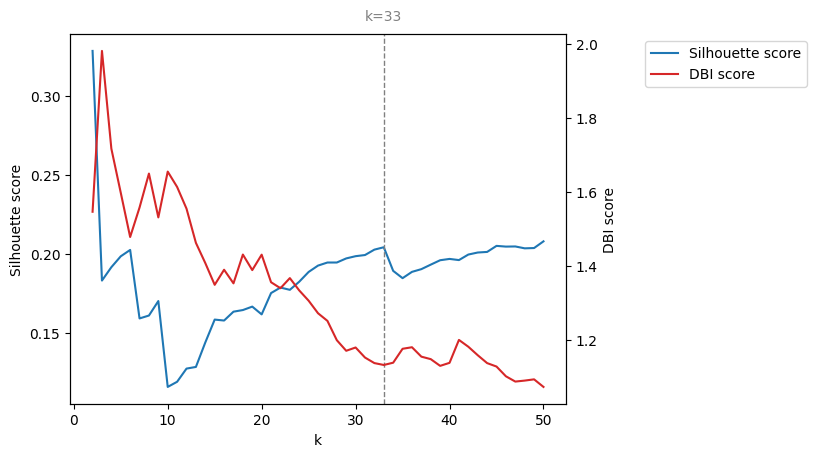

In [16]:
plotk(results_df, [33])

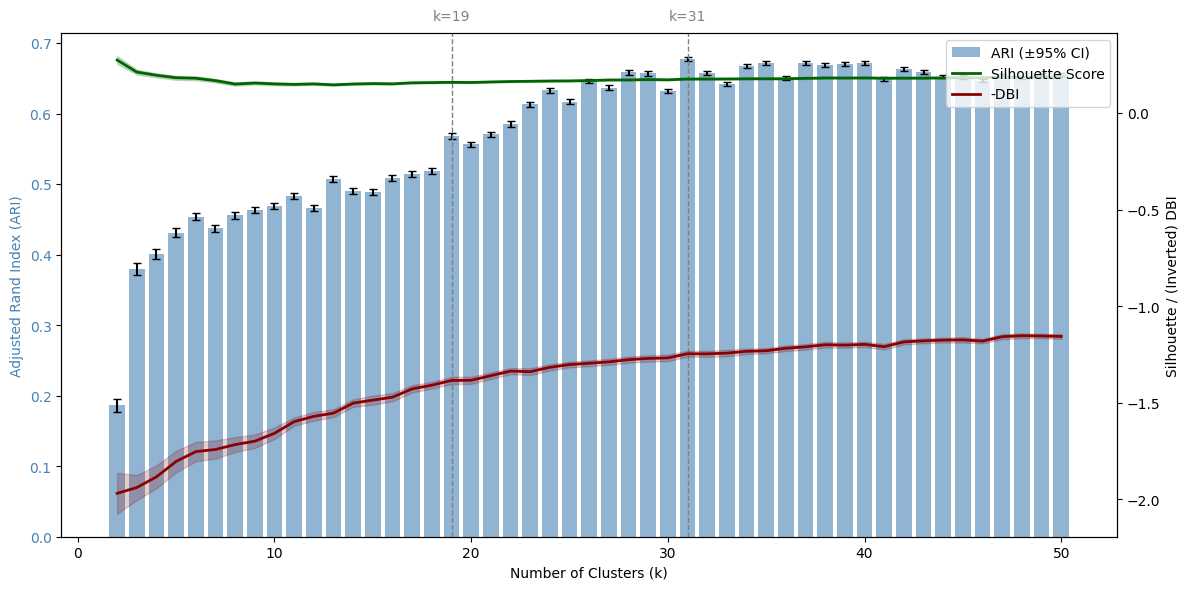

In [19]:
plot_clustering_metrics(metrics_df, vlines=[19, 31])

In [24]:
km_out_msccr, X = KM(MSCCR_IBD_CADD15_GenePy, IBD_union_genes27, 31, "MSCCR")
km_out_phen_GenePy_msccr = merge_phen_genepy(km_out_msccr, MSCCR_IBD_CADD15_GenePy, X, "MSCCR")

In [25]:
km_out_msccr.value_counts().sort_values(ascending=False)

Cluster
8          325
0          105
1          103
6           81
20          57
21          46
5           39
9           30
2           27
10          27
17          22
7           20
22          17
18          17
14          16
29          15
12          12
24          12
11          12
3           12
4           10
23           8
19           7
25           6
15           6
16           6
13           3
28           2
26           1
27           1
30           1
Name: count, dtype: int64

In [26]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_msccr, ['IBD_diagnosis', "CD_behaviour", 'Number_of_IBD_surgeries'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

[np.float64(0.0014062348653776854), np.float64(0.0033867121847616587), np.float64(6.149978196544261e-05)]


## 15 Consensus IBD Genes

In [75]:
results_df = KM_opt(MSCCR_IBD_CADD15_GenePy, IBD_union_genes15, 50, cohort_name='MSCCR')
#Optimise k based on silhouette score, DBI, and ARI
#metrics_df = compute_clustering_metrics(SotonIBD_CADD15_GenePy, IBD_union_genes15, 50, "Soton", n_iter=100)
metrics_df=pd.read_table("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Clustering metrics/MSCCR_IBD_union15_clustering_metrics.txt")
#metrics_df.to_csv("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Soton_IBD_union15_clustering_metrics.txt", sep="\t", index=False)

In [86]:
metrics_df

,k,mean_ari,std_ari,ci_ari,mean_silhouette,std_silhouette,ci_silhouette,mean_dbi,std_dbi,ci_dbi
0,2,0.264353,0.391961,0.010923,0.286543,0.068838,0.013728,1.800520,0.368867,0.073560
1,3,0.415015,0.282962,0.007885,0.241677,0.046596,0.009292,1.745338,0.292850,0.058401
2,4,0.454231,0.230598,0.006426,0.237055,0.049879,0.009947,1.610842,0.235855,0.047035
3,5,0.460425,0.197340,0.005499,0.218566,0.050346,0.010040,1.603312,0.247995,0.049456
4,6,0.480625,0.178520,0.004975,0.215904,0.050622,0.010095,1.540551,0.236912,0.047245
5,7,0.445057,0.173772,0.004843,0.202584,0.047990,0.009570,1.522525,0.168042,0.033511
6,8,0.477344,0.164109,0.004573,0.208016,0.043762,0.008727,1.480922,0.169558,0.033814
7,9,0.492929,0.166660,0.004644,0.190730,0.031147,0.006211,1.476862,0.135250,0.026972
8,10,0.492626,0.161371,0.004497,0.199881,0.037063,0.007391,1.434525,0.125988,0.025125
9,11,0.503971,0.154435,0.004304,0.204363,0.028856,0.005755,1.380586,0.098358,0.019615


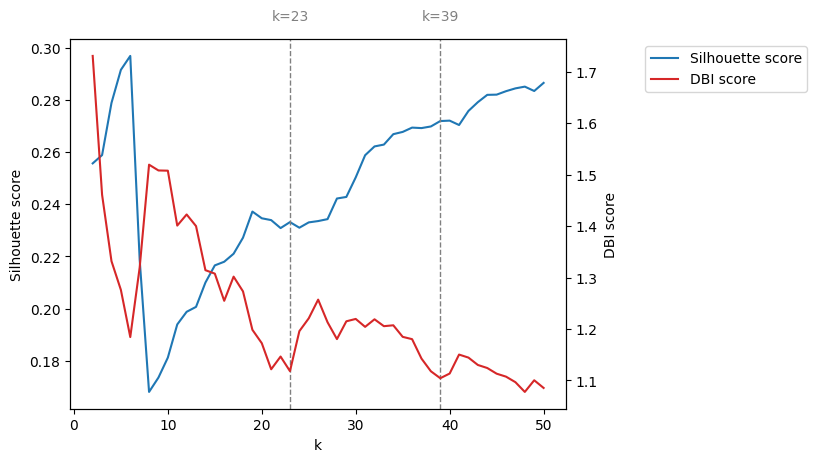

In [82]:
plotk(results_df, [23, 39])

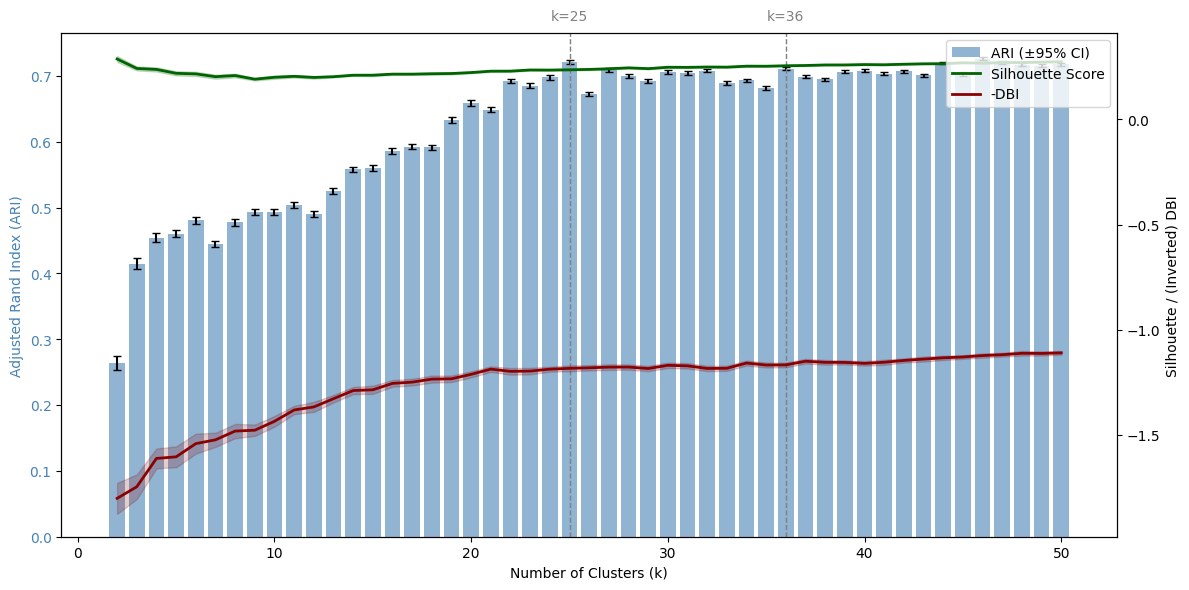

In [85]:
plot_clustering_metrics(metrics_df, vlines=[25, 36])

### K = 25

In [88]:
km_out_msccr, X = KM(MSCCR_IBD_CADD15_GenePy, IBD_union_genes15, 25, "MSCCR")
km_out_phen_GenePy_msccr = merge_phen_genepy(km_out_msccr, MSCCR_IBD_CADD15_GenePy, X, "MSCCR")
km_out_phen_GenePy_msccr.to_csv("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/MSCCR_KMeans_15F_25C_IBD_genepy.txt", sep='\t', index=False)

In [92]:
km_out_msccr.value_counts().sort_values(ascending=False)

Cluster
10         228
3          144
5           87
16          74
30          68
33          49
0           46
28          37
2           30
29          27
15          25
14          24
9           21
23          21
11          16
4           13
19          12
35          12
25          12
1           11
18          10
20           9
12           9
7            9
17           8
31           8
27           6
24           6
21           6
8            5
6            4
13           3
22           2
32           2
26           1
34           1
Name: count, dtype: int64

In [93]:
results_df = analyze_cluster_deviations(km_out_phen_GenePy_msccr, ['IBD_diagnosis', "CD_behaviour", 'Number_of_IBD_surgeries'])
values = [subdict['overall_p_value'] for subdict in list(results_df.values())[:3]]
print(values)

[np.float64(0.003390416103189964), np.float64(0.2075330121794295), np.float64(0.00019642317347815942)]


### K = 36

In [91]:
km_out_msccr, X = KM(MSCCR_IBD_CADD15_GenePy, IBD_union_genes15, 36, "MSCCR")
km_out_phen_GenePy_msccr = merge_phen_genepy(km_out_msccr, MSCCR_IBD_CADD15_GenePy, X, "MSCCR")
km_out_phen_GenePy_msccr.to_csv("/Users/fvl67/Library/CloudStorage/OneDrive-UniversityofSouthampton/PhD/Projects/ML/Unsupervised ML/K-Means Paper/Results/MSCCR_KMeans_15F_36C_IBD_genepy.txt", sep='\t', index=False)